# Volume I - Direct Current
- All About Circuits Companion
    - https://www.allaboutcircuits.com/assets/pdf/direct-current.pdf

In [1]:
# !pip3 install pandas
# !pip3 install schemdraw

In [2]:
import schemdraw
import schemdraw.elements as elm
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

## Chapter 1
- Must be an unbroken path for electrons to flow through a conductor
    - Any break stops the flow of electrons
- Voltage (specific potential energy): measure of potential energy per unit charge of electrons
- Single-direction flow of electrons is called a Direct Current (DC)
- Polarity, like voltage itself, is not specific to a single point, but is always relative between two points
- Voltage, as an expression of potential energy, is always relative between two locations, or points. Sometimes it is called a voltage ”drop.”
- When electrons move against the opposition of resistance, ”friction” is generate; manifests itself in the form of heat
- Conventional Flow Notation: electric charge moves form the positive (surplus) side of the battery to the negative (deficiency) side
- Electron Flow Notation: Electric charge moves from the negative (surplus) side of the battery to the positive (deficiency) side
- Devices that function differently on currents of different direction is called a polarized device
    - Best example of a polarized device is the diode; which is a one-way "valve" for current. Blocks current if wrong direction

### Simple Battery

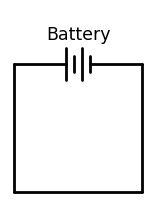

In [3]:
with schemdraw.Drawing() as d:
    d.add(elm.Battery().label("Battery"))
    d.add(elm.Line().down())
    d.add(elm.Line().left())
    d.add(elm.Line().up())

## Lamp Powered Circuit
- Two ways to do it

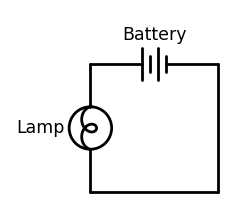

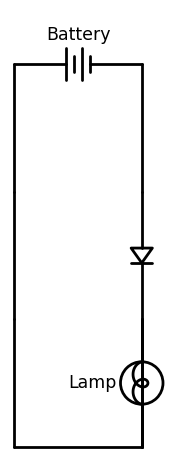

In [4]:
with schemdraw.Drawing() as d:
    d.add(elm.Battery().label("Battery"))
    d.add(elm.Line().down())
    d.add(elm.Line().left())
    d.add(elm.Lamp().label("Lamp"))
    
with schemdraw.Drawing() as d:
    d.add(elm.Battery().label("Battery"))
    d.add(elm.Line().down())
    d.add(elm.Diode())
    d.add(elm.Line().down())
    d.add(elm.Lamp().label("Lamp"))
    d.add(elm.Line().down())
    d.add(elm.Line().left())
    d.add(elm.Line().up())
    d.add(elm.Line().up())
    d.add(elm.Line().up())

## Chapter 2 - Ohm's Law
- Current, I, Ampere (Amp), A
- Voltage, E or V, Volt, V
- Resistance, R, Ohm, $\Omega$
- One coulomb of charge is equal to 6,250,000,000,000,000,000 electrons
- 1 Amp = 1 coulomb of electrons passing by a given point in a circuit in 1 second of time
- Joule = amount of work done by a force of 1 newton exerted through a motion of 1 meter (in the same direction)
    - It takes about 1 joule of energy to lift a 3/4 pound weight 1 foot off the ground, or to drag something a distance of 1 foot using a parallel pulling force of 3/4 pound
- Ohm's Law: $E = I * R$
    - Example two cells below: $I = \frac{E}{R} = \frac{12V}{3\Omega} = 4A$
- Power is how much work is performed in a given time frame
    - Ex. horsepower = $\frac{550\ ft-lb}{sec}$
    - Speed of an engine's output shaft is measured in revolutions per minute (RPM)
    - Torque is the amount of twisting force produced by the engine -> measured in pound-feet (lb-ft)
- Horsepower = $\frac{2*\pi*S*T}{33,000}$ where S = shaft speed in r.p.m, and T = shaft torque in lb-ft 
    - $Horsepower \propto S T$
- $Power = I E$ -> watts
    - 1 Horsepower = 745.7 Watts
- Power equations:
    - $P = \frac{E^2}{R}$
    - $P = I E$
    - $P = I^2 R$
- Potentiometers -> provides variable resistors
- Any device that performs a task with electric power is known as a load
- A varistor is a component that changes resistance with the amount of voltage impressed across it. With little voltage across it, its resistance is high. Then, at a certain ”break-down” or ”firing” voltage, its resistance decreases dramatically.
- Negative resistance is where the current through a component actually decreases as the applied voltage across it is increased. Some electron tubes and semiconductor diodes (most notably, the tetrode tube and the Esaki, or tunnel diode, respectively) exhibit negative resistance over a certain range of voltages
- Points directly connected together in a circuit by zero resistance (wire) are considered to be electrically common.
    - Electrically common means zero resistance
- The polarity of the voltage drop across any resistive component is determined by the direction of electron flow through it: negative entering, and positive exiting.

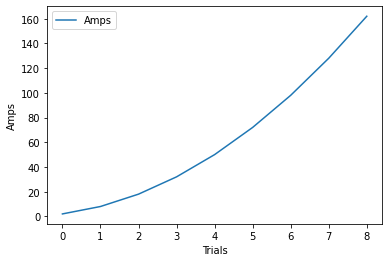

In [5]:
x, y = sp.symbols('x y')

def ohmsLaw(I = False, E = False, R = False):
    if not isinstance(I, bool) and not isinstance(E, bool):
        return E / I, "Ohms"
    elif not isinstance(I, bool) and not isinstance(R, bool):
        return I * R, "Volts"
    elif not isinstance(E, bool) and not isinstance(R, bool):
        return E / R, "Amps"
    else:
        return None

e_experimental = x ** 3
r_experimental = x / 2

e_formula = sp.lambdify(x, e_experimental, "numpy")
r_formula = sp.lambdify(x, r_experimental, "numpy")

e = e_formula(np.arange(1, 10)).tolist()
r = r_formula(np.arange(1, 10)).tolist()

amount = [x for x in range(len(e))]
results = []
units = ""

for idx in range(len(amount)):
    result, unit = ohmsLaw(E = e[idx], R = r[idx])
    results.append(result)
    units = unit

plt.xlabel('Trials')
plt.ylabel(units)
plt.plot(amount, results)
plt.legend(["Amps"])

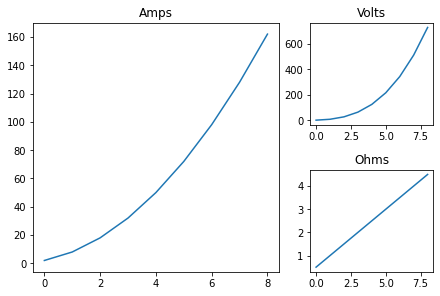

In [6]:
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

## Left
axs['Left'].set_title('Amps')
axs['Left'].plot(amount, results)

## Right Top
axs['TopRight'].set_title('Volts')
axs['TopRight'].plot(amount, e)

## Right Bottom
axs['BottomRight'].set_title('Ohms')
axs['BottomRight'].plot(amount, r)

In [7]:
print(ohmsLaw(E = 12, R = 3))
print(ohmsLaw(E = 36, I = 4))
print(ohmsLaw(I = 2, R = 7))

(4.0, 'Amps')
(9.0, 'Ohms')
(14, 'Volts')


In [8]:
def power(E = False, I = False, R = False):
    if not isinstance(I, bool) and not isinstance(E, bool):
        return I * E, "Watts"
    elif not isinstance(I, bool) and not isinstance(R, bool):
        return I ** 2 * R, "Watts"
    elif not isinstance(E, bool) and not isinstance(R, bool):
        return E ** 2 / R, "Watts"
    else:
        return False


def horsepower(S, T):
    """
        S = shaft speed in r.p.m.
        T = shaft torque in lb-ft
    """
    return (2 * np.pi * S * T) / 33000, "Horsepower"

def horsepower2Watts(H):
    return horsepower * 745.7, "Watts"

def watts2Horsepower(W):
    return W / 745.7, "Horsepower"

def watts2Kilowatts(W):
    return W * 1000, "Kilowatts"

def kilowatts2Watts(Kw):
    return Kw / 1000, "Watts"

In [9]:
print(power(E = 18, I = 6))
print(power(E = 36, I = 12))
r = ohmsLaw(E = 10, I = 2)
print(f"Resistance = {r}")
print(f"Power = {power(R=r[0], I=2)}")

(108, 'Watts')
(432, 'Watts')
Resistance = (5.0, 'Ohms')
Power = (20.0, 'Watts')


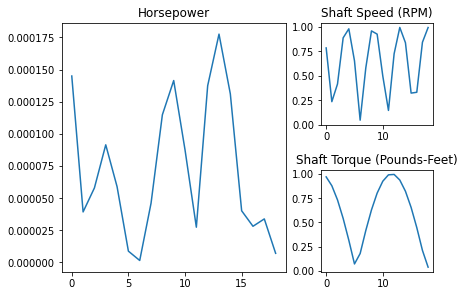

In [10]:
s_experimental = abs(sp.cos((2*y)/3))
t_experimental = abs(sp.cos(y/4))

s_formula = sp.lambdify(y, s_experimental, "numpy")
t_formula = sp.lambdify(y, t_experimental, "numpy")

s = s_formula(np.arange(1, 20)).tolist()
t = t_formula(np.arange(1, 20)).tolist()

amount = [x for x in range(len(s))]
results = []
units = ""

for idx in range(len(amount)):
    result, unit = horsepower(s[idx], t[idx])
    results.append(result)
    units = unit

fig2 = plt.figure(constrained_layout=True)
axs = fig2.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

## Left
axs['Left'].set_title('Horsepower')
axs['Left'].plot(amount, results)

## Right Top
axs['TopRight'].set_title('Shaft Speed (RPM)')
axs['TopRight'].plot(amount, s)

## Right Bottom
axs['BottomRight'].set_title('Shaft Torque (Pounds-Feet)')
axs['BottomRight'].plot(amount, t)

## Chapter 5 - Series and Parallel Circuits
- Series connection means only one path for electrons to flow
    - Total resistance of any series circuit is equal to the sum of the individual resistance
    - $I = \frac{E}{\Sigma(R)}$
- Parallel means there are many paths but only one voltage across all components
    - Components in a parallel circuit share the same voltage
        - $E_{Total} = E_1 = E_2 = ... E_n$
    - Total resistance in a parallel circuit is less than any of the individual resistances
        - $R_{Total} = \frac{1}{\Sigma_i\frac{1}{R_i}}$
        - Total parallel conductance is greater than any of the individual branch conductances because parallel resistors conduct better together than they would separately
    -  Total current must equal the sum of all individual resistor (”branch”) currents
        - $I_{Total} = \Sigma_i(\frac{E_i}{R_i}) = \Sigma_i{I_i}$
    - Conductance, G, Siemens, mhos units
        - $G = \frac{1}{R_{Total}}$ -> $R_{Total} = \frac{1}{\Sigma_i\frac{1}{R_i}}$
- A ”branch” in a parallel circuit is a path for electric current formed by one of the load components (such as a resistor)
- Power is additive: $P_{Total} = \Sigma_i P_i$

Series


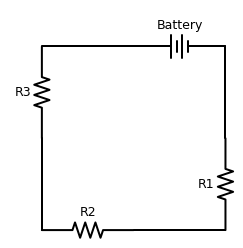

In [11]:
with schemdraw.Drawing() as d:
    print("Series")
    d.add(elm.Battery().label("Battery"))
    d.add(elm.Line().down())
    d.add(elm.Resistor().label("R1"))
    d.add(elm.Line().left())
    d.add(elm.Resistor().label("R2"))
    d.add(elm.Line().up())
    d.add(elm.Resistor().label("R3"))
    d.add(elm.Line().right())

Parallel


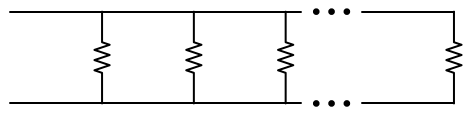

In [12]:
print("Parallel")
with schemdraw.Drawing(show=False) as d1:
    d1 += elm.Line()
    d1.push()
    d1 += elm.Resistor().down()
    d1 += elm.Line().left()
    d1.pop()

with schemdraw.Drawing() as d2:
    for i in range(3):
        d2 += elm.ElementDrawing(d1)

    d2.push()
    d2 += elm.Line().length(d2.unit/6)
    d2 += elm.DotDotDot()
    d2 += elm.ElementDrawing(d1)
    d2.pop()
    d2.here = (d2.here[0], d2.here[1]-d2.unit)
    d2 += elm.Line().right().length(d2.unit/6)
    d2 += elm.DotDotDot()

In [13]:
def sciNote(val):
    return "{:e}".format(val)

def series(R: list, NP = False):
    if NP:
        return np.sum(R), "Ohms"
    else:
        return sum(R), "Ohms"

ans, units = ohmsLaw(E = 9, R = series([3000, 10000, 5000])[0])
print(f"Series Problem: {sciNote(ans)} {units}")

# Only for equations missing I right now
def parallel(R: list, E: list, NP = False):
    if NP:
        return E[0] / np.sum([e/r for e,r in zip(R,E)]), "Ohms"
    else:
        return (sum(E)/len(E)) / sum([e/r for e, r in zip(R, E)]), "Ohms"

ans, units = parallel([10000,2000,1000], [9]*4)
print(f"Parallel Problem: {sciNote(ans)} {units}")
ansNP, unitsNP = parallel(np.array([10000,2000,1000],dtype=float),np.array([9]*4,dtype=float), NP = True)
print(f"Parallel Problem: {sciNote(ansNP)} {unitsNP}")

Series Problem: 5.000000e-04 Amps
Parallel Problem: 6.230769e-03 Ohms
Parallel Problem: 6.230769e-03 Ohms


## Chapter 6 - Divider Circuits And Kirchhoff's Laws
- A Series circuit is often called a voltage divider for its ability to proportion (divide) the total voltage
    - $E_n = E_{Total} \frac{R_n}{R_{Total}}$
    - One device frequently used as a voltage-dividing component is the potentiometer, which is a resistor with a movable element positioned by a manual knob or lever. The movable element, typically called a wiper, makes contact with a resistive strip of material (commonly called the slidewire if made of resistive metal wire) at any point selected by the manual control
- Kirchhoff's Voltage Law -> sum of all voltages in a loop equal zero
     - $\Sigma_{Loop}E = 0$
- A parallel circuit is often called a current divider for its ability to proportion (divide) the total current into fractional parts
    - $I_n = I_{Total}\frac{R_{Total}}{R_n}$
- Kirchhoff's Current Law (KCL) -> sum of all currents entering and exiting a node must equal zero
    - $I_{Entering} = I_{Exiting}$

In [14]:
# Problem on pages 171 (6.1)
Rs = [5000,10000,7500]
totalR = series(Rs)
print(f"Total Resistance: {totalR[0]} {totalR[1]}")
totalI = ohmsLaw(E = 45, R = totalR[0])
print(f"Total Current: {totalI[0]} {totalI[1]}")

for idx in range(len(Rs)):
    E_i = ohmsLaw(I = totalI[0], R = Rs[idx])
    print(f"E_{idx}: {E_i[0]} {E_i[1]}")

Total Resistance: 22500 Ohms
Total Current: 0.002 Amps
E_0: 10.0 Volts
E_1: 20.0 Volts
E_2: 15.0 Volts


In [15]:
def voltageDivider_Series(E_total, R_total, R_i):
    return E_total * (R_i / R_total), "Volts"

for idx in range(len(Rs)):
    E_i = voltageDivider_Series(45, totalR[0], Rs[idx])
    print(f"E_{idx}: {E_i[0]} {E_i[1]}")

E_0: 10.0 Volts
E_1: 20.0 Volts
E_2: 15.0 Volts


## Chapter 7 - Series-Parallel Combination Circuits
- Series Circuits:
    - Voltage drops add to equal total voltage.
    - All components share the same (equal) current.
    - Resistances add to equal total resistance.
- Parallel Circuits:
    - All components share the same (equal) voltage.
    - Branch currents add to equal total current.
    - Resistances diminish to equal total resistance.

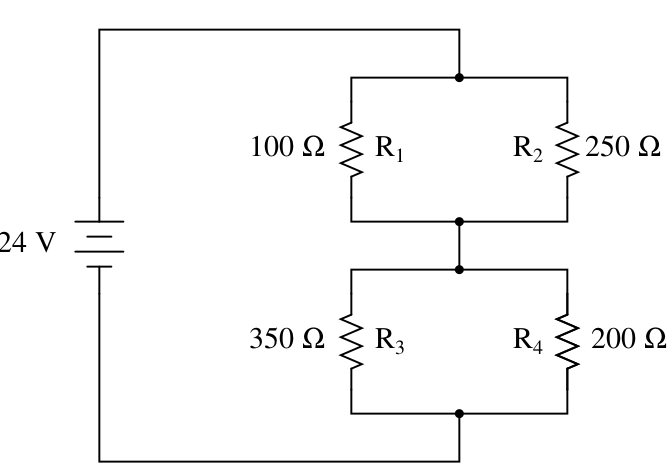

In [16]:
# Problem from chapter 7 (201)
def calculateRTotal_Parallel(R):
    return 1 / sum([1 / r for r in R]), "Ohms"

Es = [np.nan] * 6 + [24]
Is = [np.nan] * 7
Rs = [100,250,350,200, np.nan, np.nan, np.nan]
colNames = ["R1","R2","R3","R4","R1 || R2", "R3 || R4", "Total"]
rowNames = ["E", "I", "R"]
df = pd.DataFrame([Es, Is, Rs], columns = colNames, index = rowNames)

df

,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,NaN,NaN,NaN,NaN,NaN,NaN,24.0
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,100.0,250.0,350.0,200.0,NaN,NaN,NaN


In [17]:
R_total_1 = calculateRTotal_Parallel(df.iloc[-1, :2])
R_total_2 = calculateRTotal_Parallel(df.iloc[-1, 2:4])
R_total = series([R_total_1[0], R_total_2[0]])
df.at['R', 'R1 || R2'] = R_total_1[0]
df.at['R', 'R3 || R4'] = R_total_2[0]
df.at['R', 'Total'] = R_total[0]

df

,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,NaN,NaN,NaN,NaN,NaN,NaN,24.000000
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,100.0,250.0,350.0,200.0,71.428571,127.272727,198.701299


In [18]:
I_total = ohmsLaw(E = 24, R = R_total[0])
# Thus I_r1_r2 and I_r3_r4 are equal
df.loc['I', 4:] = I_total[0]

df

/tmp/ipykernel_3983/210080217.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc['I', 4:] = I_total[0]


,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,NaN,NaN,NaN,NaN,NaN,NaN,24.000000
I,NaN,NaN,NaN,NaN,0.120784,0.120784,0.120784
R,100.0,250.0,350.0,200.0,71.428571,127.272727,198.701299


In [19]:
# Solve for Parallel Voltages: E_1_2, E_3_4
E_1_2 = ohmsLaw(I = I_total[0], R = R_total_1[0])
E_3_4 = ohmsLaw(I = I_total[0], R = R_total_2[0])
df.loc['E', 'R1 || R2'] = E_1_2[0]
df.loc['E', 'R3 || R4'] = E_3_4[0]

df

,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,NaN,NaN,NaN,NaN,8.627451,15.372549,24.000000
I,NaN,NaN,NaN,NaN,0.120784,0.120784,0.120784
R,100.0,250.0,350.0,200.0,71.428571,127.272727,198.701299


In [20]:
# Which means E_1, E2 = E_1_2; E_3, E_4 = E_3_4
df.loc['E', ['R1', 'R2']] = E_1_2[0]
df.loc['E', ['R3', 'R4']] = E_3_4[0]

df

,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,8.627451,8.627451,15.372549,15.372549,8.627451,15.372549,24.000000
I,NaN,NaN,NaN,NaN,0.120784,0.120784,0.120784
R,100.000000,250.000000,350.000000,200.000000,71.428571,127.272727,198.701299


In [21]:
Is = [ohmsLaw(R = Rs[idx], E = E_1_2[0])[0] if idx < 2 else ohmsLaw(R = Rs[idx], E = E_3_4[0])[0] for idx in range(4)]
df.iloc[1, :4] = Is

df

,R1,R2,R3,R4,R1 || R2,R3 || R4,Total
E,8.627451,8.627451,15.372549,15.372549,8.627451,15.372549,24.000000
I,0.086275,0.034510,0.043922,0.076863,0.120784,0.120784,0.120784
R,100.000000,250.000000,350.000000,200.000000,71.428571,127.272727,198.701299


In [22]:
# Problem from chapter 7 (201) 
# Without Pandas
def calculateRTotal_Parallel(R):
    return 1 / sum([1 / r for r in R]), "Ohms"

Rs = [100, 250, 350, 200]

R_total_1 = calculateRTotal_Parallel(Rs[:2])
R_total_2 = calculateRTotal_Parallel(Rs[2:])
R_total = series([R_total_1[0], R_total_2[0]])

I_total = ohmsLaw(E = 24, R = R_total[0])

# Thus I_r1_r2 and I_r3_r4 are equal
I_r1_4 = I_total

# Solve E_1_2, E_3_4
E_1_2 = ohmsLaw(I = I_r1_4[0], R = R_total_1[0])
E_3_4 = ohmsLaw(I = I_r1_4[0], R = R_total_2[0])

# Which means E_1, E2 = E_1_2; E_3, E_4 = E_3_4
Is = [ohmsLaw(R = Rs[idx], E = E_1_2[0]) if idx < 2 else ohmsLaw(R = Rs[idx], E = E_3_4[0]) for idx in range(len(Rs))]
print(Is)

[(0.08627450980392158, 'Amps'), (0.03450980392156863, 'Amps'), (0.04392156862745098, 'Amps'), (0.07686274509803921, 'Amps')]


## Chapter 10 - DC Network Analysis
- How do you perform network analysis on this schema? Its impossible to reduce this further. 
    - 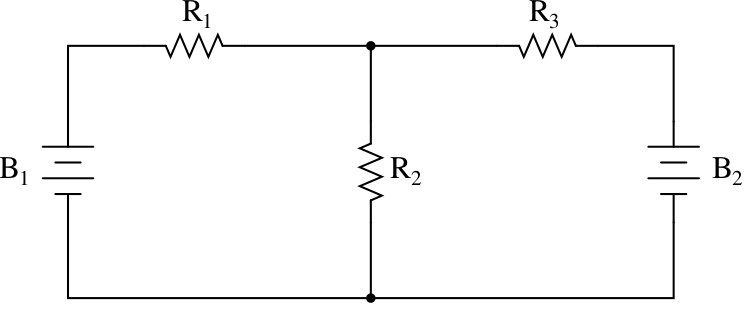
- Mathematical techniques to solve for multiple unknowns (called “simultaneous equations” or “systems”) can be applied to basic Laws of circuits to solve networks.
- Branch Current Method 
    - (1) Choose a node and assume directions of currents.
    - (2) Write a KCL equation relating currents at the node.
    - (3) Label resistor voltage drop polarities based on assumed currents.
    - (4) Write KVL equations for each loop of the circuit, substituting the product IR for E in each resistor term of the equations.
    - (5) Solve for unknown branch currents (simultaneous equations).
    - (6) If any solution is negative, then the assumed direction of current for that solution is wrong!
    - (7) Solve for voltage drops across all resistors (E=IR).

- 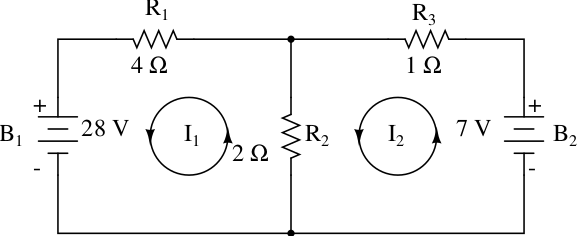
- Mesh Equations
    - $6I_1 - 2I_2 = 28$
    - $-2I_1 + 3I_2 = -7$

In [23]:
B = np.array(
    [
        [6, -2],
        [-2, 3]
    ]
)
b = np.array([28, -7]).reshape((2,1))
x = solve(B, b)

for i in range(len(x)):
    print(f"I{i} is equal to {round(x[i][0])}")

I0 is equal to 5
I1 is equal to 1


## Will Revisit Chapter 10 When Solving The Electic Circuits Workbook By Nahvi

## Chapter 13 - Capacitors
- Whenever an electric voltage exists between two separated conductors, an electric field is present within the space between those conductors.
    - Force (voltage) is the amount of push that a field exerts over a certain distance
    - Flux (current) is the total quantity/effect of the field through space
- Capacitors (C) tend to resist changes in voltage drop. Units are Farad (F)
    - When voltage across a capacitor is increased or decreased, the capacitor ”resists” the change by drawing current from or supplying current to the source of the voltage change, in opposition to the change
    - Capacitor acts as a load
    - Capacitance is also a measure of the intensity of opposition to changes in voltage (exactly how much current it will produce for a given rate of change in voltage)
    - $i = C\frac{dv}{dt}$
        - i = instantaneous current through capacitor
        - C = Capacitance in Farads
        - $\frac{dv}{dt}$ = instantaneous rate of voltage change (volts per second)
    - In a capacitor, however, time is an essential variable, because current is related to how rapidly voltage changes over time.
    - Factors affecting capacitance
        - Plate Area: greater plate area gives greater capacitance
        - Plate Spacing: closer plate spacing gives greater capacitance
        - Dielectric Material: greater permittivity of the dielectric gives greater capacitance
    - Approximate capacitance for any pair of separated conductors -> $C = \frac{\epsilon A}{d}$
        - C = Capacitance in Farads
        - $\epsilon$ = Permittivity of dielectric
        - A = Area of plate overlap in square meters
        - d = Distance between plates in meters
    - Series Capacitances -> $C_{total} = \frac{1}{\Sigma \frac{1}{C_n}}$
    - Parallel Capacitances -> $C_{total} = \Sigma C_n$

## Chapter 14 - Magnetism and Electromagnetism
- All materials are magnetic to some degree, and those that are not considered ferromagnetic (easily magnetized) are classified as either paramagnetic (slightly magnetic) or diamagnetic (tend to exclude magnetic fields). Of the two, diamagnetic materials are the strangest. In the presence of an external magnetic field, they actually become slightly magnetized in the opposite direction, so as to repel the external field!
- When electrons flow through a conductor, a magnetic field will be produced around that conductor.
- The left-hand rule states that the magnetic flux lines produced by a current-carrying wire will be oriented the same direction as the curled fingers of a person’s left hand (in the ”hitchhiking” position), with the thumb pointing in the direction of electron flow.
- Magnetomotive Force – The quantity of magnetic field force, or ”push.” Analogous to electric voltage (electromotive force).
- Field Flux – The quantity of total field effect, or ”substance” of the field. Analogous to electric current.
- Field Intensity – The amount of field force (mmf) distributed over the length of the electromagnet. Sometimes referred to as Magnetizing Force.
- Flux Density – The amount of magnetic field flux concentrated in a given area.
- Reluctance – The opposition to magnetic field flux through a given volume of space or material. Analogous to electrical resistance.
- Permeability – The specific measure of a material’s acceptance of magnetic flux, analogous to the specific resistance of a conductive material (ρ), except inverse (greater permeability means easier passage of magnetic flux, whereas greater specific resistance means more difficult passage of electric current)
- The major caveat here is that the reluctance of a material to magnetic flux actually changes with the concentration of flux going through it
- Ohms law for magnetic circuits -> $mmf = \Phi R$
    - $R = \frac{1}{\mu A}$
- self-induction: a changing magnetic field produced by changes in current through a wire inducing voltage along the length of that same wire
    - $e = N \frac{d\Phi}{dt}$
        - e = (Instantaneous) induced voltage in volts
        - N = turns in wire coil
        - $\Phi$ = magnetic flux in Webers
        - t = time in secs
- A very useful property of transformers is the ability to transform voltage and current levels according to a simple ratio, determined by the ratio of input and output coil turns. If the energized coil of a transformer is energized by an AC voltage, the amount of AC voltage induced in the unpowered coil will be equal to the input voltage multiplied by the ratio of output to input wire turns in the coils.

In [27]:
Quantity = ["Field Force", "Field Flux", "Field Intensity", "Flux Density", "Reluctance", "Permeability"]
Symbol = ["mmf", "Phi", "H", "B", "R", "mu"]
Units = ["Amp-turn", "Weber(WB)", "Amp-turns per meter", "Tesla", "Amp-turns per Weber", "Tesla-meters per Amp-turn"]
colNames = ["Quantity", "Symbol", "Units"]

df = pd.DataFrame([Quantity, Symbol, Units], index = colNames)
df.T

,Quantity,Symbol,Units
0,Field Force,mmf,Amp-turn
1,Field Flux,Phi,Weber(WB)
2,Field Intensity,H,Amp-turns per meter
3,Flux Density,B,Tesla
4,Reluctance,R,Amp-turns per Weber
5,Permeability,mu,Tesla-meters per Amp-turn


## Chapter 15 - Inductors
- ”Electrons moving through an inductor tend to stay in motion; electrons at rest in an inductor tend to stay at rest.”
- When an inductor is faced with an increasing current, it acts as a load: dropping voltage as it absorbs energy (negative on the current entry side and positive on the current exit side, like a resistor).
- When an inductor is faced with a decreasing current, it acts as a source: creating voltage as it releases stored energy (positive on the current entry side and negative on the current exit side, like a battery).
- The ability of an inductor to store energy in the form of a magnetic field (and consequently to oppose changes in current) is called inductance. It is measured in the unit of the Henry (H).
- Ohms Law for an inductor
    - $v = L \frac{di}{dt}$
        - v = instantaneous voltage across the inductor
        - L = inductance in Henrys
        - $\frac{di}{dt}$ = instantaneous rate of current change (amps per second)
- Page 499

## Chapter 16 - RC & L/R Time Constants
- Thursday